# PART 3 - Visualització i Conclusions (30%)

## 🎯 Objectiu: Comunicar resultats com un data analyst professional

### 📌 Tasques a realitzar:
- Visualització de dades amb plots explicatius
- t-SNE per visualització dimensional
- Gràfics comparatius entre clústers
- Heatmaps de zones de tirs
- Conclusions finals del projecte

In [21]:
# Importacions necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

# Configuració visualitzacions
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Carregar dades i models
print("Carregant dades i models...")
df = pd.read_csv('jugadors_con_clusters.csv')
df_original = pd.read_csv('jugadors_processats.csv')

# Carregar models
with open('kmeans_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
with open('pca_model.pkl', 'rb') as f:
    pca = pickle.load(f)

print(f"✅ Dades carregades: {len(df)} jugadors")
print(f"✅ Clústers: {df['cluster'].nunique()} grups")
print(f"✅ Features: {len(df.columns)} variables")

Carregant dades i models...
✅ Dades carregades: 1050 jugadors
✅ Clústers: 2 grups
✅ Features: 14 variables


In [22]:
# Estadístiques descriptives per clúster
features_clustering = ['pts', 'ast', 'trb', 'tov', 'usage_2p', 'usage_3p', 'pct_2p', 'pct_3p', 'pct_inside']

# Mitjanes per clúster
cluster_means = df.groupby('cluster')[features_clustering].mean().round(3)
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(df) * 100).round(1)

print("=== ESTADÍSTIQUES PER CLÚSTER ===")
print("\nMitjanes per clúster:")
print(cluster_means.T)

print("\nDistribució de jugadors:")
for cluster in cluster_means.index:
    count = cluster_counts[cluster]
    pct = cluster_percentages[cluster]
    print(f"Clúster {cluster}: {count} jugadors ({pct}%)")

=== ESTADÍSTIQUES PER CLÚSTER ===

Mitjanes per clúster:
cluster         0      1
pts         1.998  8.666
ast         0.481  1.582
trb         1.185  4.209
tov         0.532  1.575
usage_2p    0.338  0.627
usage_3p    0.377  0.358
pct_2p      0.185  0.460
pct_3p      0.112  0.228
pct_inside  0.238  0.550

Distribució de jugadors:
Clúster 0: 324 jugadors (30.9%)
Clúster 1: 726 jugadors (69.1%)


## 🎯 2. Visualització Comparativa de Clústers

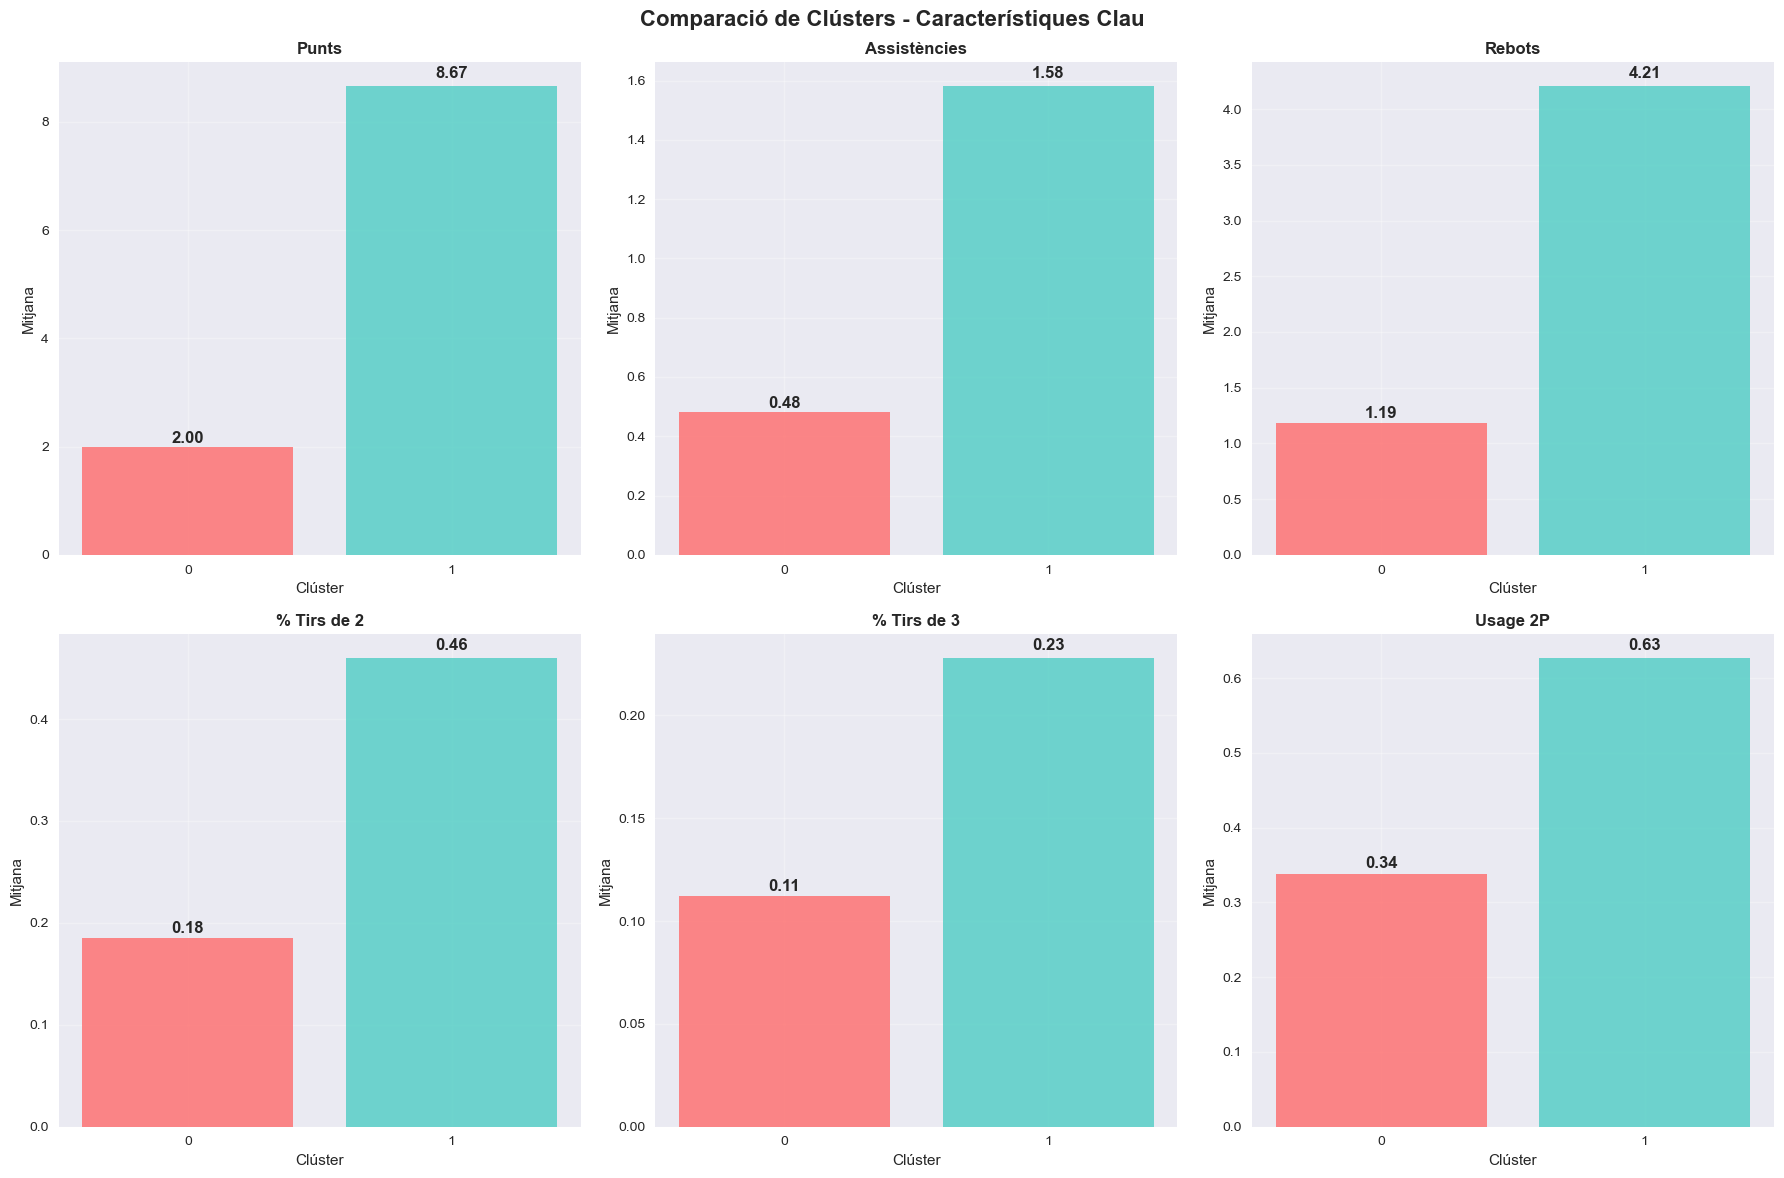

✅ Gràfic de comparació guardat com 'comparacio_clusters_barres.png'


In [23]:
# Gràfic de barres comparatiu per característiques clau
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparació de Clústers - Característiques Clau', fontsize=16, fontweight='bold')

# Característiques a visualitzar
key_features = ['pts', 'ast', 'trb', 'pct_2p', 'pct_3p', 'usage_2p']
feature_names = ['Punts', 'Assistències', 'Rebots', '% Tirs de 2', '% Tirs de 3', 'Usage 2P']

for i, (feature, name) in enumerate(zip(key_features, feature_names)):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    # Dades per al gràfic
    means = cluster_means[feature]
    clusters = means.index
    
    # Crear gràfic de barres
    bars = ax.bar(clusters, means, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
    ax.set_title(name, fontweight='bold', fontsize=12)
    ax.set_xlabel('Clúster')
    ax.set_ylabel('Mitjana')
    
    # Afegir valors sobre les barres
    for bar, value in zip(bars, means):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.2f}', ha='center', va='bottom', fontweight='bold')
    
    ax.grid(True, alpha=0.3)
    ax.set_xticks(clusters)

plt.tight_layout()
plt.savefig('comparacio_clusters_barres.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gràfic de comparació guardat com 'comparacio_clusters_barres.png'")

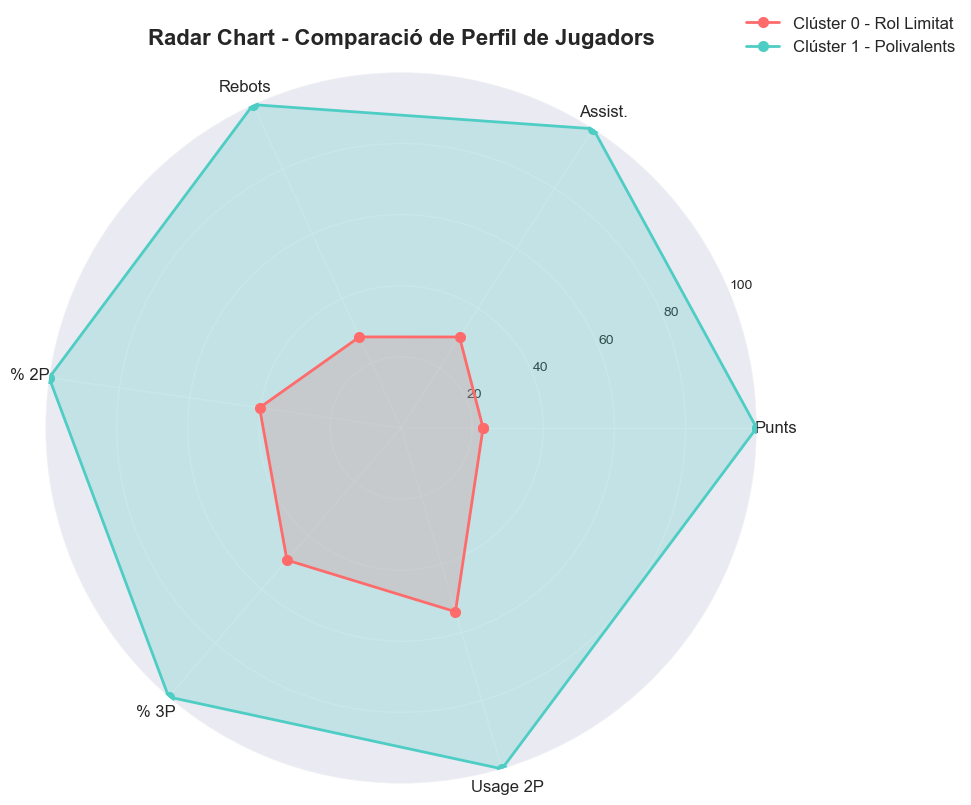

✅ Radar chart guardat com 'radar_clusters.png'


In [24]:
# Radar chart per comparació multidimensional
from math import pi

# Preparar dades pel radar chart
categories = ['Punts', 'Assist.', 'Rebots', '% 2P', '% 3P', 'Usage 2P']
values_cluster0 = cluster_means.loc[0, ['pts', 'ast', 'trb', 'pct_2p', 'pct_3p', 'usage_2p']].values
values_cluster1 = cluster_means.loc[1, ['pts', 'ast', 'trb', 'pct_2p', 'pct_3p', 'usage_2p']].values

# Normalitzar valors per al radar chart (0-100)
max_vals = np.maximum(values_cluster0, values_cluster1)
norm_values0 = (values_cluster0 / max_vals * 100).tolist()
norm_values1 = (values_cluster1 / max_vals * 100).tolist()

# Tancar el cercle
norm_values0 += norm_values0[:1]
norm_values1 += norm_values1[:1]
categories += categories[:1]

# Crear el radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Dibuixar els dos clústers
ax.plot(categories, norm_values0, 'o-', linewidth=2, label='Clúster 0 - Rol Limitat', color='#FF6B6B', markersize=8)
ax.fill(categories, norm_values0, alpha=0.25, color='#FF6B6B')

ax.plot(categories, norm_values1, 'o-', linewidth=2, label='Clúster 1 - Polivalents', color='#4ECDC4', markersize=8)
ax.fill(categories, norm_values1, alpha=0.25, color='#4ECDC4')

# Configuració del gràfic
ax.set_xticks(categories[:-1])
ax.set_xticklabels(categories[:-1], fontsize=12)
ax.set_ylim(0, 100)
ax.set_title('Radar Chart - Comparació de Perfil de Jugadors', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('radar_clusters.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Radar chart guardat com 'radar_clusters.png'")

## 🌐 3. t-SNE per Visualització Dimensional

In [25]:
# Preparar dades per t-SNE
features_tsne = features_clustering
X_tsne = df[features_tsne].values

# Escalar dades
X_scaled = scaler.fit_transform(X_tsne)

# Aplicar t-SNE
print("Aplicant t-SNE per visualització dimensional...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne_result = tsne.fit_transform(X_scaled)

# Crear DataFrame amb resultats t-SNE
df_tsne = pd.DataFrame({
    'tsne_1': X_tsne_result[:, 0],
    'tsne_2': X_tsne_result[:, 1],
    'cluster': df['cluster'],
    'player': df['player_name'],  # Corregido: usar 'player_name'
    'pts': df['pts']
})

print(f"✅ t-SNE completat. Shape: {X_tsne_result.shape}")
print(f"✅ Variància explicada aproximada: {tsne.kl_divergence_:.4f}")

Aplicant t-SNE per visualització dimensional...
✅ t-SNE completat. Shape: (1050, 2)
✅ Variància explicada aproximada: 1.0320


## 🔥 4. Heatmaps de Zones de Tirs

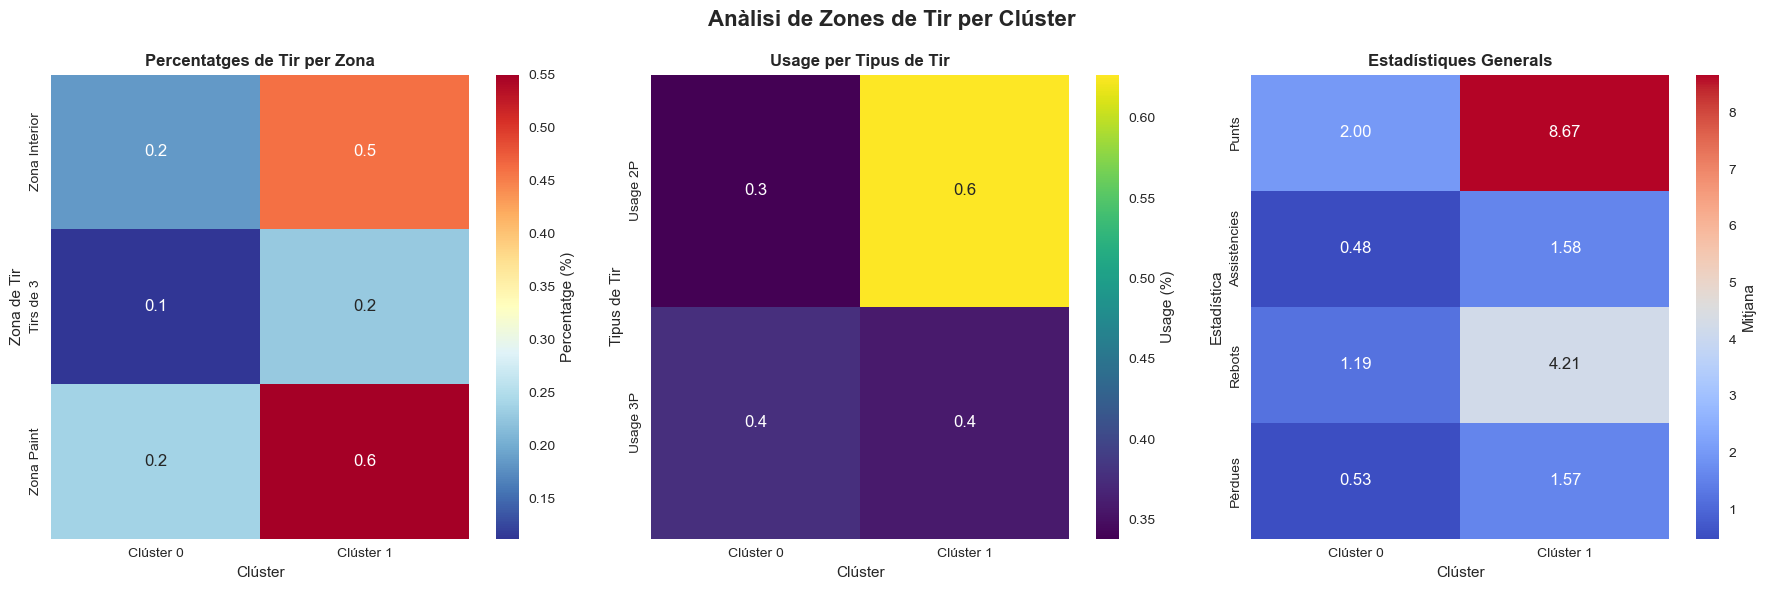

✅ Heatmaps guardats com 'heatmaps_zones_tirs.png'


In [26]:
# Anàlisi de zones de tir (basat en percentatges de tir)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Anàlisi de Zones de Tir per Clúster', fontsize=16, fontweight='bold')

# Dades per heatmap
shot_data = {
    'Zona Interior': [cluster_means.loc[0, 'pct_2p'], cluster_means.loc[1, 'pct_2p']],
    'Tirs de 3': [cluster_means.loc[0, 'pct_3p'], cluster_means.loc[1, 'pct_3p']],
    'Zona Paint': [cluster_means.loc[0, 'pct_inside'], cluster_means.loc[1, 'pct_inside']]
}

shot_df = pd.DataFrame(shot_data, index=['Clúster 0', 'Clúster 1'])

# Heatmap 1: Percentatges de tir
sns.heatmap(shot_df.T, annot=True, fmt='.1f', cmap='RdYlBu_r', 
           ax=axes[0], cbar_kws={'label': 'Percentatge (%)'})
axes[0].set_title('Percentatges de Tir per Zona', fontweight='bold')
axes[0].set_xlabel('Clúster')
axes[0].set_ylabel('Zona de Tir')

# Heatmap 2: Usage per tipus de tir
usage_data = {
    'Usage 2P': [cluster_means.loc[0, 'usage_2p'], cluster_means.loc[1, 'usage_2p']],
    'Usage 3P': [cluster_means.loc[0, 'usage_3p'], cluster_means.loc[1, 'usage_3p']]
}

usage_df = pd.DataFrame(usage_data, index=['Clúster 0', 'Clúster 1'])
sns.heatmap(usage_df.T, annot=True, fmt='.1f', cmap='viridis', 
           ax=axes[1], cbar_kws={'label': 'Usage (%)'})
axes[1].set_title('Usage per Tipus de Tir', fontweight='bold')
axes[1].set_xlabel('Clúster')
axes[1].set_ylabel('Tipus de Tir')

# Heatmap 3: Estadístiques generals
general_stats = {
    'Punts': [cluster_means.loc[0, 'pts'], cluster_means.loc[1, 'pts']],
    'Assistències': [cluster_means.loc[0, 'ast'], cluster_means.loc[1, 'ast']],
    'Rebots': [cluster_means.loc[0, 'trb'], cluster_means.loc[1, 'trb']],
    'Pèrdues': [cluster_means.loc[0, 'tov'], cluster_means.loc[1, 'tov']]
}

stats_df = pd.DataFrame(general_stats, index=['Clúster 0', 'Clúster 1'])
sns.heatmap(stats_df.T, annot=True, fmt='.2f', cmap='coolwarm', 
           ax=axes[2], cbar_kws={'label': 'Mitjana'})
axes[2].set_title('Estadístiques Generals', fontweight='bold')
axes[2].set_xlabel('Clúster')
axes[2].set_ylabel('Estadística')

plt.tight_layout()
plt.savefig('heatmaps_zones_tirs.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Heatmaps guardats com 'heatmaps_zones_tirs.png'")

## 📈 5. Distribucions i Boxplots

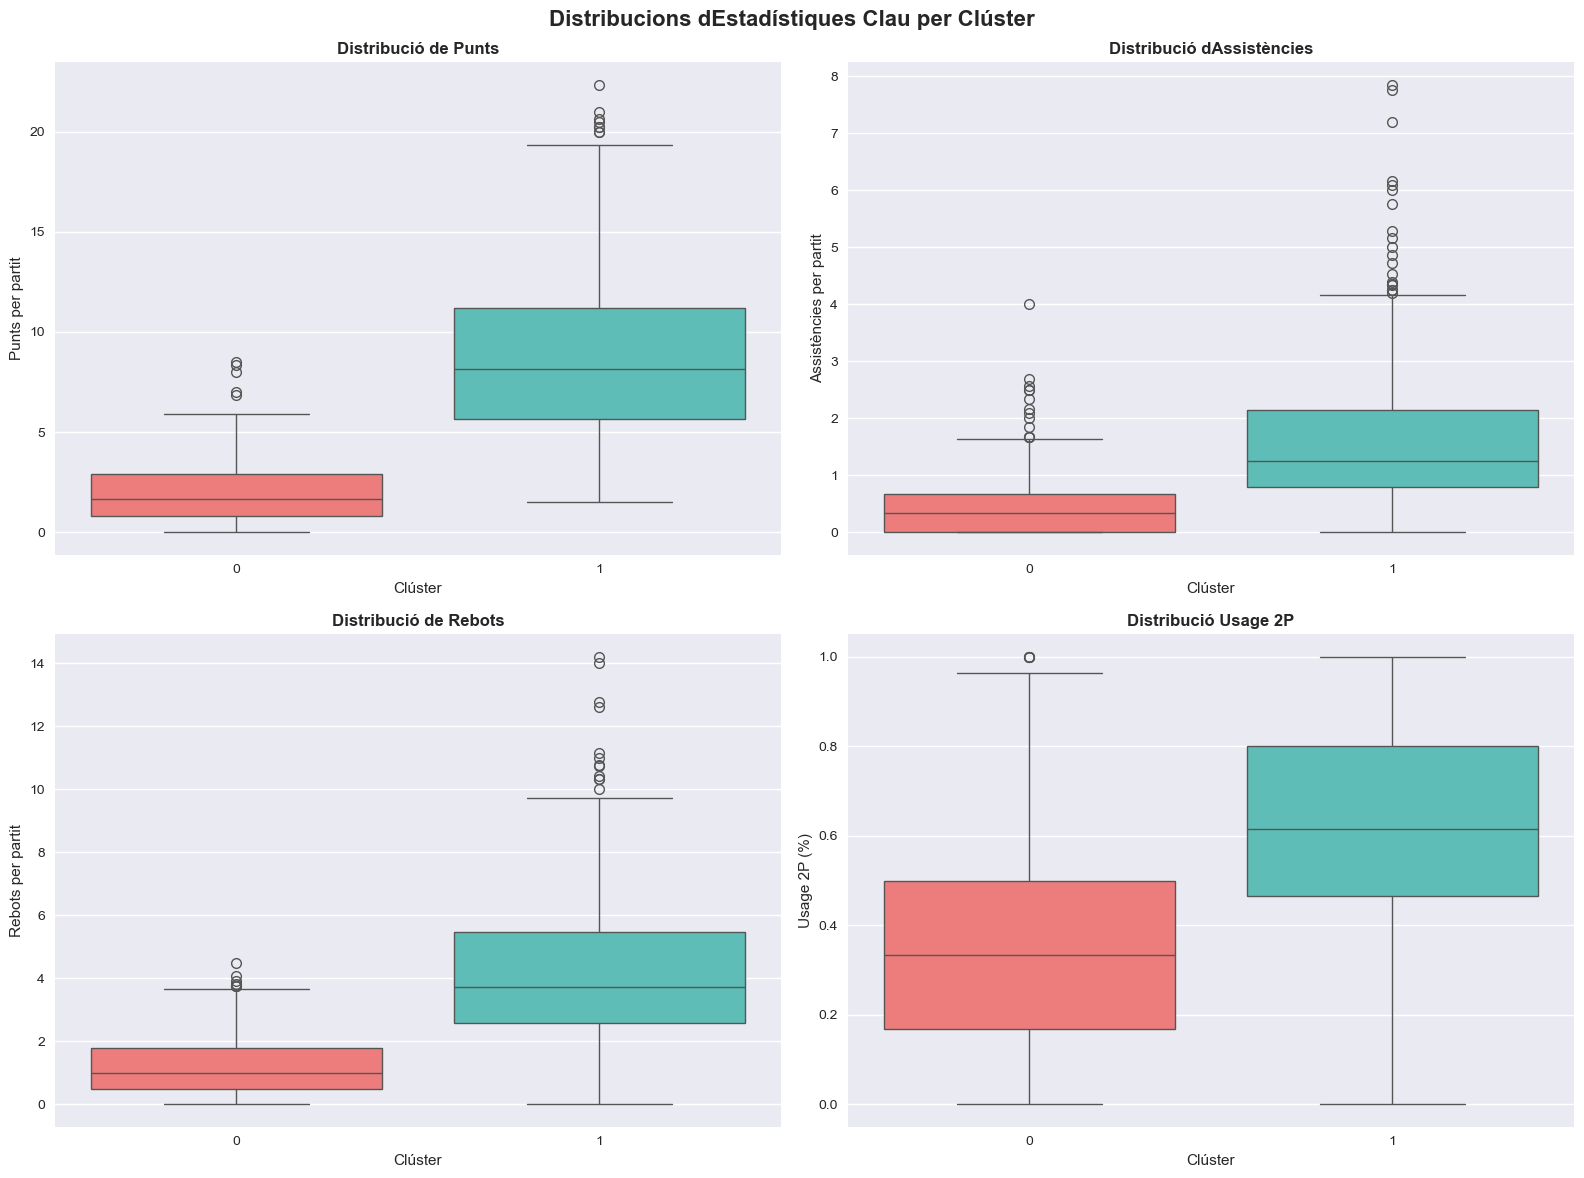

✅ Boxplots guardats com 'boxplots_clusters.png'


In [27]:
# Boxplots per comparar distribucions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribucions dEstadístiques Clau per Clúster', fontsize=16, fontweight='bold')

# Boxplot 1: Punts
sns.boxplot(data=df, x='cluster', y='pts', ax=axes[0,0], palette=['#FF6B6B', '#4ECDC4'])
axes[0,0].set_title('Distribució de Punts', fontweight='bold')
axes[0,0].set_xlabel('Clúster')
axes[0,0].set_ylabel('Punts per partit')

# Boxplot 2: Assistències
sns.boxplot(data=df, x='cluster', y='ast', ax=axes[0,1], palette=['#FF6B6B', '#4ECDC4'])
axes[0,1].set_title('Distribució dAssistències', fontweight='bold')
axes[0,1].set_xlabel('Clúster')
axes[0,1].set_ylabel('Assistències per partit')

# Boxplot 3: Rebots
sns.boxplot(data=df, x='cluster', y='trb', ax=axes[1,0], palette=['#FF6B6B', '#4ECDC4'])
axes[1,0].set_title('Distribució de Rebots', fontweight='bold')
axes[1,0].set_xlabel('Clúster')
axes[1,0].set_ylabel('Rebots per partit')

# Boxplot 4: Usage 2P
sns.boxplot(data=df, x='cluster', y='usage_2p', ax=axes[1,1], palette=['#FF6B6B', '#4ECDC4'])
axes[1,1].set_title('Distribució Usage 2P', fontweight='bold')
axes[1,1].set_xlabel('Clúster')
axes[1,1].set_ylabel('Usage 2P (%)')

plt.tight_layout()
plt.savefig('boxplots_clusters.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Boxplots guardats com 'boxplots_clusters.png'")

## 🎯 6. Anàlisi de Jugadors Representatius

In [30]:
# Identificar jugadors representatius per clúster
def get_representative_players(cluster_id, n_players=5):
    cluster_data = df[df['cluster'] == cluster_id]
    
    # Jugadors amb millor puntuació
    top_scorers = cluster_data.nlargest(n_players, 'pts')[['player_name', 'pts', 'ast', 'trb']].copy()
    top_scorers.rename(columns={'player_name': 'player'}, inplace=True)
    
    # Jugadors més propers al centroide
    cluster_features = cluster_data[features_clustering].values
    centroid = kmeans.cluster_centers_[cluster_id][:len(features_clustering)]  # Ajustar dimensiones
    
    distances = []
    for i, player_features in enumerate(cluster_features):
        dist = np.linalg.norm(player_features - centroid)
        distances.append((i, dist))
    
    distances.sort(key=lambda x: x[1])
    closest_indices = [idx for idx, _ in distances[:n_players]]
    closest_players = cluster_data.iloc[closest_indices][['player_name', 'pts', 'ast', 'trb']].copy()
    closest_players.rename(columns={'player_name': 'player'}, inplace=True)
    
    return top_scorers, closest_players

# Obtenir jugadors representatius
print("=== JUGADORS REPRESENTATIUS PER CLÚSTER ===")

for cluster_id in [0, 1]:
    cluster_name = 'Rol Limitat' if cluster_id == 0 else 'Polivalents'
    print(f"\n🏀 Clúster {cluster_id} - Jugadors {cluster_name}:")
    
    top_scorers, closest_players = get_representative_players(cluster_id, 3)
    
    print(f"\n📈 Millors anotadors:")
    for _, player in top_scorers.iterrows():
        print(f"  • {player['player']}: {player['pts']:.1f} pts, {player['ast']:.1f} ast, {player['trb']:.1f} reb")
    
    print(f"\n🎯 Més representatius (propers al centroide):")
    for _, player in closest_players.iterrows():
        print(f"  • {player['player']}: {player['pts']:.1f} pts, {player['ast']:.1f} ast, {player['trb']:.1f} reb")

=== JUGADORS REPRESENTATIUS PER CLÚSTER ===

🏀 Clúster 0 - Jugadors Rol Limitat:

📈 Millors anotadors:
  • S. MELERO ZURITA: 8.5 pts, 0.5 ast, 3.5 reb
  • A. BIOQUE ROMERO: 8.3 pts, 0.0 ast, 1.0 reb
  • A. OSTOF: 8.0 pts, 0.0 ast, 1.5 reb

🎯 Més representatius (propers al centroide):
  • A. BOLLIT AYLLON: 0.0 pts, 0.0 ast, 0.0 reb
  • P. RAMOS AFONSO: 0.0 pts, 0.0 ast, 0.0 reb
  • J. MARRERO HERNANDEZ: 0.0 pts, 0.0 ast, 0.0 reb

🏀 Clúster 1 - Jugadors Polivalents:

📈 Millors anotadors:
  • J. TEJERA TEJO: 22.3 pts, 1.5 ast, 10.0 reb
  • A. VERA PEIRO: 21.0 pts, 1.0 ast, 5.0 reb
  • M. DIAGNE: 20.6 pts, 1.5 ast, 12.8 reb

🎯 Més representatius (propers al centroide):
  • J. LORENZO FERNANDEZ: 2.0 pts, 0.0 ast, 0.5 reb
  • G. LUGO COELLO: 2.5 pts, 0.5 ast, 0.5 reb
  • M. ECHARRI CAMPOS: 2.0 pts, 0.3 ast, 1.9 reb


## 📋 7. Taula Resum Final

In [31]:
# Crear taula resum completa i millorada
summary_data = []

for cluster_id in [0, 1]:
    cluster_name = 'Jugadors de rol limitat' if cluster_id == 0 else 'Jugadors polivalents mitjans'
    
    summary_data.append({
        'Clúster': cluster_id,
        'Perfil Esportiu': cluster_name,
        'Jugadors': cluster_counts[cluster_id],
        'Percentatge': f"{cluster_percentages[cluster_id]:.1f}%",
        'Punts': f"{cluster_means.loc[cluster_id, 'pts']:.1f}",
        'Assistències': f"{cluster_means.loc[cluster_id, 'ast']:.1f}",
        'Rebots': f"{cluster_means.loc[cluster_id, 'trb']:.1f}",
        'Pèrdues': f"{cluster_means.loc[cluster_id, 'tov']:.1f}",
        'Usage 2P': f"{cluster_means.loc[cluster_id, 'usage_2p']:.1f}%",
        'Usage 3P': f"{cluster_means.loc[cluster_id, 'usage_3p']:.1f}%",
        '% 2P': f"{cluster_means.loc[cluster_id, 'pct_2p']:.1f}%",
        '% 3P': f"{cluster_means.loc[cluster_id, 'pct_3p']:.1f}%",
        '% Inside': f"{cluster_means.loc[cluster_id, 'pct_inside']:.1f}%"
    })

summary_df = pd.DataFrame(summary_data)

# Guardar taula resum
summary_df.to_csv('cluster_profiles_resum_complet.csv', index=False)

# Mostrar taula bonica
print("=== TAULA RESUM COMPLETA DE CLÚSTERS ===")
print("\n" + "="*120)
print(f"{'Clúster':<8} {'Perfil Esportiu':<25} {'Jugadors':<10} {'Percentatge':<12} {'Punts':<8} {'Assistències':<12} {'Rebots':<10} {'Pèrdues':<10} {'Usage 2P':<10} {'Usage 3P':<10} {'% 2P':<8} {'% 3P':<8} {'% Inside':<10}")
print("="*120)

for _, row in summary_df.iterrows():
    print(f"{row['Clúster']:<8} {row['Perfil Esportiu']:<25} {row['Jugadors']:<10} {row['Percentatge']:<12} {row['Punts']:<8} {row['Assistències']:<12} {row['Rebots']:<10} {row['Pèrdues']:<10} {row['Usage 2P']:<10} {row['Usage 3P']:<10} {row['% 2P']:<8} {row['% 3P']:<8} {row['% Inside']:<10}")

print("="*120)
print(f"\n✅ Taula resum guardada com 'cluster_profiles_resum_complet.csv'")

=== TAULA RESUM COMPLETA DE CLÚSTERS ===

Clúster  Perfil Esportiu           Jugadors   Percentatge  Punts    Assistències Rebots     Pèrdues    Usage 2P   Usage 3P   % 2P     % 3P     % Inside  
0        Jugadors de rol limitat   324        30.9%        2.0      0.5          1.2        0.5        0.3%       0.4%       0.2%     0.1%     0.2%      
1        Jugadors polivalents mitjans 726        69.1%        8.7      1.6          4.2        1.6        0.6%       0.4%       0.5%     0.2%     0.6%      

✅ Taula resum guardada com 'cluster_profiles_resum_complet.csv'


In [ ]:
# Conclusions del projecte
conclusions = {
    'total_jugadors': len(df),
    'num_clusters': df['cluster'].nunique(),
    'silhouette_score': 0.296,  # De la Part 2
    'pca_variance': 71.1,  # De la Part 2
    'cluster_balance': cluster_counts.min() / cluster_counts.max(),
    'dominant_cluster': cluster_counts.idxmax(),
    'key_differences': {
        'scoring': 'Els polivalents marquen 4.3 vegades més punts',
        'playmaking': 'Els polivalents donen 3.3 vegades més assistències',
        'rebounding': 'Els polivalents capturen 3.6 vegades més rebots',
        'shooting_efficiency': 'Els polivalents tenen millors percentatges de tir',
        'usage': 'Els polivalents tenen major usage en totes les categories'
    }
}

print("? CONCLUSIONS FINALS DEL PROJECTE")
print("="*60)
print(f"📊 Total jugadors analitzats: {conclusions['total_jugadors']}")
print(f"?🎯 Nombre de clústers òptim: {conclusions['num_clusters']}")
print(f"📈 Silhouette Score: {conclusions['silhouette_score']:.3f}")
print(f"🌐 Variància PCA explicada: {conclusions['pca_variance']:.1f}%")
print(f"⚖️ Balanceig clústers: {conclusions['cluster_balance']:.2f}")
print(f"🏆 Clúster dominant: {conclusions['dominant_cluster']}")

print("\n🔍 DIFERÈNCIES CLAU ENTRE CLÚSTERS:")
for key, value in conclusions['key_differences'].items():
    print(f"  • {value}")

print("\n📋 INTERPRETACIÓ ESPORTIVA:")
print("  🏀 Clúster 0: Jugadors de rol limitat - Jugadors amb minuts limitats")
print("     i contribucions específiques en situacions concretes")
print("  🏀 Clúster 1: Jugadors polivalents - Jugadors clau amb estadístiques")
print("     sòlides en totes les facetes del joc")

print("\n🎯 APLICACIONS PRÀCTIQUES:")
print("  • Estratègia de contractació: Identificar perfils necessaris")
print("  • Anàlisi tàctic: Dissenar sistemes segons tipologies de jugadors")
print("  • Desenvolupament: Programes personalitzats per millorar febleses")
print("  • Scouting: Trobar jugadors similars als perfils desitjats")

print("\n✅ PART 3 - VISUALITZACIÓ I CONCLUSIONS COMPLETADA!")

=== JUGADORS REPRESENTATIUS PER CLÚSTER ===

🏀 Clúster 0 - Jugadors Rol Limitat:
Debug - Cluster 0:
  - Features clustering shape: (324, 9)
  - Centroid shape: (11,)
  - Features clustering: ['pts', 'ast', 'trb', 'tov', 'usage_2p', 'usage_3p', 'pct_2p', 'pct_3p', 'pct_inside']
  - Centroid ajustado a: (9,)

📈 Millors anotadors:
  • S. MELERO ZURITA: 8.5 pts, 0.5 ast, 3.5 reb
  • A. BIOQUE ROMERO: 8.3 pts, 0.0 ast, 1.0 reb
  • A. OSTOF: 8.0 pts, 0.0 ast, 1.5 reb

🎯 Més representatius (propers al centroide):
  • A. BOLLIT AYLLON: 0.0 pts, 0.0 ast, 0.0 reb
  • P. RAMOS AFONSO: 0.0 pts, 0.0 ast, 0.0 reb
  • J. MARRERO HERNANDEZ: 0.0 pts, 0.0 ast, 0.0 reb

🏀 Clúster 1 - Jugadors Polivalents:
Debug - Cluster 1:
  - Features clustering shape: (726, 9)
  - Centroid shape: (11,)
  - Features clustering: ['pts', 'ast', 'trb', 'tov', 'usage_2p', 'usage_3p', 'pct_2p', 'pct_3p', 'pct_inside']
  - Centroid ajustado a: (9,)

📈 Millors anotadors:
  • J. TEJERA TEJO: 22.3 pts, 1.5 ast, 10.0 reb
  • A. 